# CS 580 RYL 5

## Setup

In [1]:
# dependencies

# import jax
# import jax.numpy as jnp
import numpy as np
import pandas as pd
# import PIL
import scipy
# import sympy as sp
from matplotlib import pyplot as plt
from scipy.optimize import minimize

## RYL 5

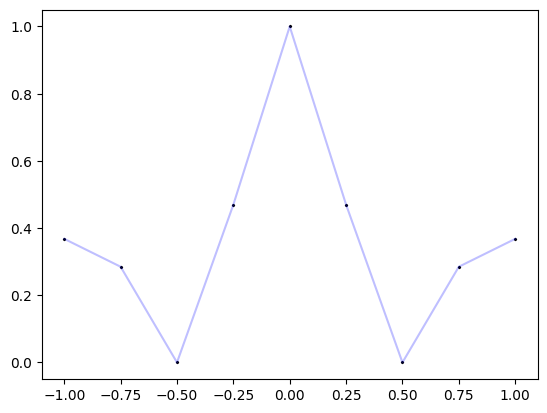

In [2]:
# Consider the model:
# y= e^(−x^2)*cos(θ1*x)
# and the data points given in UnidentPoints.txt

def f(th, x):
    return np.exp(-(x**2))*np.cos(th*x)

data = pd.read_csv("unidentpoints.txt", delimiter=r'\s+', header=None).values
x=data[:, 0]
y=data[:, 1]

# plot
plt.plot(x, y, color="blue", alpha=0.25)
plt.scatter(x, y, marker="x", color="black", s=2)

### (a)

In [3]:
# (a) Plot your data points and some representative model curves. Are there multiple model
# curves that may fit your data exactly?
x_plotting = np.linspace(-1.5, 1.5, 50)


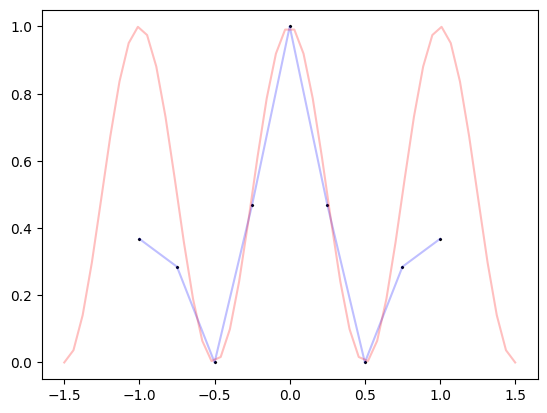

In [4]:
# one example model curve (eyeballed)
y_plotting = (1/2)*np.cos(2*np.pi*x_plotting)+0.5

plt.plot(x, y, color="blue", alpha=0.25)
plt.scatter(x, y, marker="x", color="black", s=2)
plt.plot(x_plotting, y_plotting, color="red", alpha=0.25)

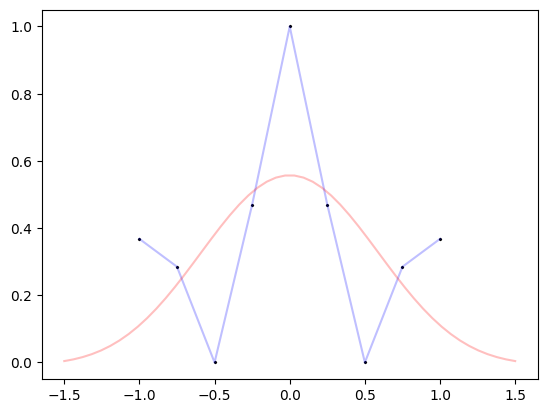

In [5]:
# let's try a linear least squares solution adapted from similar to our nonlinear case

def linear_basis(x):
    return np.array([np.exp(-(x**2))*np.cos(x)]).T

A = linear_basis(x)
theta, *_ = np.linalg.lstsq(A, y)
a_plotting = linear_basis(x_plotting)
y_plotting = np.matmul(a_plotting, theta)

plt.plot(x, y, color="blue", alpha=0.25)
plt.scatter(x, y, marker="x", color="black", s=2)
plt.plot(x_plotting, y_plotting, color="red", alpha=0.25)

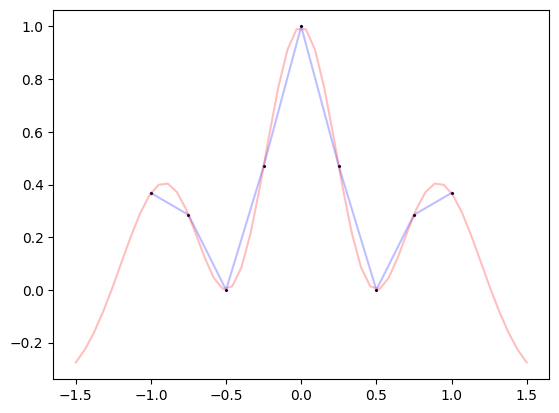

In [6]:
# here's an over-parameterized linear one that will definitely work

def linear_basis(x):
    out = np.array(
        [
            np.sin(x),
            np.cos(x),
            np.sin(2*x),
            np.cos(2*x),
            np.sin(4*x),
            np.cos(4*x),
            np.sin(6*x),
            np.cos(6*x),
            np.sin(8*x),
            np.cos(8*x),
            np.sin(10*x),
            np.cos(10*x),
        ]
    ).T
    return out

A = linear_basis(x)
theta, *_ = np.linalg.lstsq(A, y)
a_plotting = linear_basis(x_plotting)
y_plotting = np.matmul(a_plotting, theta)

plt.plot(x, y, color="blue", alpha=0.25)
plt.scatter(x, y, marker="x", color="black", s=2)
plt.plot(x_plotting, y_plotting, color="red", alpha=0.25)

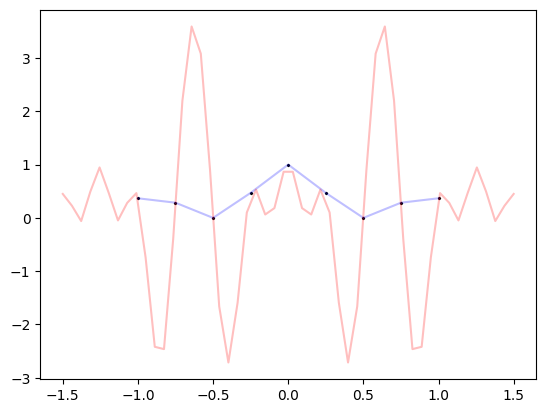

In [7]:
# here's another over-parameterized linear one

def linear_basis(x):
    out = np.array(
        [
            np.sin(x),
            np.cos(x),
            np.sin(5*x),
            np.cos(5*x),
            np.sin(10*x),
            np.cos(10*x),
            np.sin(15*x),
            np.cos(15*x),
            np.sin(20*x),
            np.cos(20*x),
            np.sin(25*x),
            np.cos(25*x),
        ]
    ).T
    return out

A = linear_basis(x)
theta, *_ = np.linalg.lstsq(A, y)
a_plotting = linear_basis(x_plotting)
y_plotting = np.matmul(a_plotting, theta)

plt.plot(x, y, color="blue", alpha=0.25)
plt.scatter(x, y, marker="x", color="black", s=2)
plt.plot(x_plotting, y_plotting, color="red", alpha=0.25)

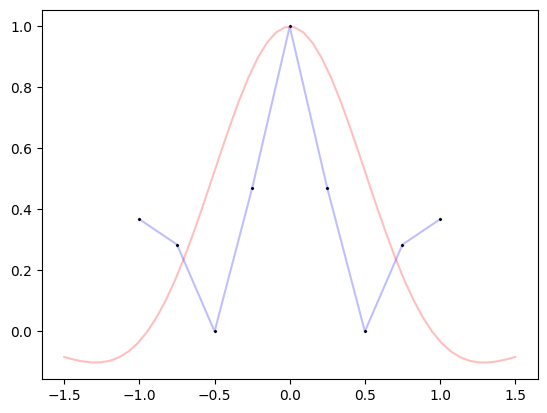

In [8]:
# now let's try a nonlinear regression based on 1/2 l2-norm-squared

def c(th, x, y):
    y_hat = f(th, x)
    diff = y_hat-y
    normmed = np.linalg.norm(diff, ord=2)
    return (1/2)*(normmed**2)

th = minimize(c, np.array(1), args=(x, y))
y_plotting = f(th.x, x_plotting)

plt.plot(x, y, color="blue", alpha=0.25)
plt.scatter(x, y, marker="x", color="black", s=2)
plt.plot(x_plotting, y_plotting, color="red", alpha=0.25)

In [9]:
# answering the question above, yes, there are multiple model
# curves that may fit our data exactly. These are illustrated
# by hyper-parameterized models plotted above.

### (b)

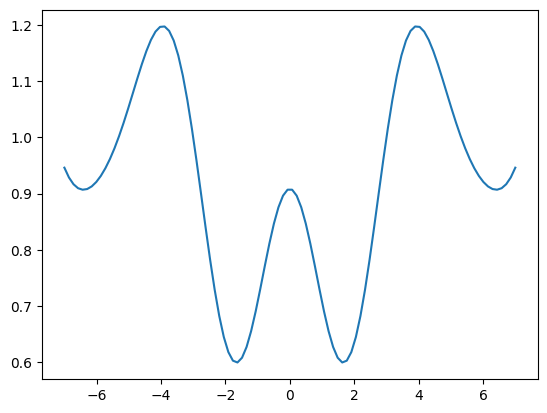

In [10]:
# (b) Define your cost as C=(1/2)(l_2_norm^2)
# Plot the cost surface of your model and identify the minimum/minima. Note that your cost
# “surface” is one-dimensional.

# I defined this cost in my nonlinear example in (a)
def c(th, x, y):
    y_hat = f(th, x)
    diff = y_hat-y
    normmed = np.linalg.norm(diff, ord=2)
    return (1/2)*(normmed**2)

possible_thetas = np.linspace(-7, 7, 100)
possible_costs = np.array([c(th, x, y) for th in possible_thetas])
assert possible_thetas.shape == possible_costs.shape

plt.plot(possible_thetas, possible_costs)

### (c)


      ---------
      The best fit started theta at -0.36842105263157965,
      optimized theta to -1.6587953835715636, and
      had a cost of 0.5993550962492508
      ---------



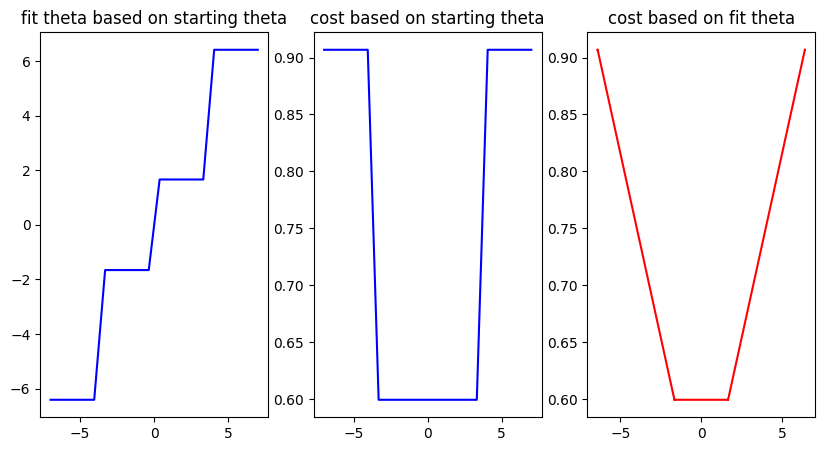

In [11]:
# (c) Produce several fits to your data with varying initial parameter guesses and report their
# cost.

# I started something like this in my nonlinear regression in (a), and can use a similar strategy to (b).
possible_theta_starts = np.linspace(-7, 7, 20)
part_c_fits = np.full(possible_theta_starts.shape, np.inf)
part_c_costs = np.full(possible_theta_starts.shape, np.inf)
best_fit = np.array([np.inf, np.inf, np.inf]) # start theta, fit theta, cost
for i, th in enumerate(possible_theta_starts):
    fit = minimize(c, th, args=(x, y))
    cost = c(fit.x[0], x, y)
    part_c_fits[i] = fit.x[0]
    part_c_costs[i] = cost
    if cost <= best_fit[2]:
        best_fit = np.array([th, fit.x[0], cost])

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(possible_theta_starts, part_c_fits, color="blue")
ax[0].set_title("fit theta based on starting theta")
ax[1].plot(possible_theta_starts, part_c_costs, color="blue")
ax[1].set_title("cost based on starting theta")
ax[2].plot(part_c_fits, part_c_costs, color="red")
ax[2].set_title("cost based on fit theta")

print(f"""\n      ---------
      The best fit started theta at {best_fit[0]},
      optimized theta to {best_fit[1]}, and
      had a cost of {best_fit[2]}
      ---------\n""")

### (d)

In [12]:
# (d) Is there a regime in which θ1 is an unidentifiable parameter? Why or why not? If so, what
# could be changed about your sampling to make θ1 an identifiable parameter?

# Yes. Because theta is inside a cosine, fluctuating values of theta cannot be identified as different.
# Because of this, if sampling was not at a regular interval, as it was in our data, theta would be
# identifiable.

## Notes

I did not use a page of notes coming into this RYL